In [1]:
# import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
def summary(dataframe):
    print(dataframe.head())
    print(dataframe.info())
    print(dataframe.describe(include="all"))

In [3]:
def load_data():
    data = {}
    data["train"] = pd.read_csv("input/train.csv")
    data["test"] = pd.read_csv("input/test.csv")
    data["event_type"] = pd.read_csv("input/event_type.csv")
    data["resource_type"] = pd.read_csv("input/resource_type.csv")
    data["severity_type"] = pd.read_csv("input/severity_type.csv")
    data["log_feature"] = pd.read_csv("input/log_feature.csv")
    return data

data = load_data()

In [4]:
data["train"].head()

,id,location,fault_severity
0,14121,location 118,1
1,9320,location 91,0
2,14394,location 152,1
3,8218,location 931,1
4,14804,location 120,0


In [5]:
data["test"].head()

,id,location
0,11066,location 481
1,18000,location 962
2,16964,location 491
3,4795,location 532
4,3392,location 600


In [6]:
sample_submission = pd.read_csv("input/sample_submission.csv")
sample_submission.head()

,id,predict_0,predict_1,predict_2
0,11066,0,1,0
1,18000,0,1,0
2,16964,0,1,0
3,4795,0,1,0
4,3392,0,1,0


### train & test

In [7]:
summary(data["train"])

      id      location  fault_severity
0  14121  location 118               1
1   9320   location 91               0
2  14394  location 152               1
3   8218  location 931               1
4  14804  location 120               0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 3 columns):
id                7381 non-null int64
location          7381 non-null object
fault_severity    7381 non-null int64
dtypes: int64(2), object(1)
memory usage: 173.1+ KB
None
                  id      location  fault_severity
count    7381.000000          7381      7381.00000
unique           NaN           929             NaN
top              NaN  location 821             NaN
freq             NaN            85             NaN
mean     9264.649099           NaN         0.45021
std      5349.290176           NaN         0.66656
min         1.000000           NaN         0.00000
25%      4647.000000           NaN         0.00000
50%      9222.000000         

In [8]:
summary(data["test"])

      id      location
0  11066  location 481
1  18000  location 962
2  16964  location 491
3   4795  location 532
4   3392  location 600
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11171 entries, 0 to 11170
Data columns (total 2 columns):
id          11171 non-null int64
location    11171 non-null object
dtypes: int64(1), object(1)
memory usage: 174.6+ KB
None
                  id      location
count   11171.000000         11171
unique           NaN          1039
top              NaN  location 734
freq             NaN           109
mean     9284.330230           NaN
std      5360.065369           NaN
min         2.000000           NaN
25%      4630.000000           NaN
50%      9316.000000           NaN
75%     13926.000000           NaN
max     18552.000000           NaN


In [9]:
data["train"]["fault_severity"].value_counts()

0    4784
1    1871
2     726
Name: fault_severity, dtype: int64

#### Remark:
+ location should be categorized or numerized?
+ number of location in train_data is less than in test_data
+ imbalanced classfication

In [10]:
data.keys()

dict_keys(['log_feature', 'event_type', 'resource_type', 'test', 'severity_type', 'train'])

### event_type

In [11]:
summary(data["event_type"])

     id     event_type
0  6597  event_type 11
1  8011  event_type 15
2  2597  event_type 15
3  5022  event_type 15
4  5022  event_type 11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 2 columns):
id            31170 non-null int64
event_type    31170 non-null object
dtypes: int64(1), object(1)
memory usage: 487.1+ KB
None
                  id     event_type
count   31170.000000          31170
unique           NaN             53
top              NaN  event_type 11
freq             NaN           7888
mean     9267.735258            NaN
std      5363.817181            NaN
min         1.000000            NaN
25%      4625.250000            NaN
50%      9287.500000            NaN
75%     13915.000000            NaN
max     18552.000000            NaN


In [12]:
# check if id is sum of train_id and test_id
data["event_type"]["id"].count() == data["train"]["id"].count() + data["test"]["id"].count()

False

In [13]:
data["event_type"]["id"].nunique() == data["train"]["id"].count() + data["test"]["id"].count()

True

In [14]:
data["train"].merge(data["event_type"], how="left", left_on="id", right_on="id")["event_type"].nunique()

49

#### Remark:
+ The id of event_type is dublicable, its unique is the sum of ...
+ Should be grouped w.r.t. id columns
+ some events in test_data not appear on train_data

In [15]:
data.keys()

dict_keys(['log_feature', 'event_type', 'resource_type', 'test', 'severity_type', 'train'])

### severity_type

In [16]:
summary(data["severity_type"])

     id    severity_type
0  6597  severity_type 2
1  8011  severity_type 2
2  2597  severity_type 2
3  5022  severity_type 1
4  6852  severity_type 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18552 entries, 0 to 18551
Data columns (total 2 columns):
id               18552 non-null int64
severity_type    18552 non-null object
dtypes: int64(1), object(1)
memory usage: 290.0+ KB
None
                  id    severity_type
count   18552.000000            18552
unique           NaN                5
top              NaN  severity_type 2
freq             NaN             8737
mean     9276.500000              NaN
std      5355.645433              NaN
min         1.000000              NaN
25%      4638.750000              NaN
50%      9276.500000              NaN
75%     13914.250000              NaN
max     18552.000000              NaN


In [17]:
data["severity_type"].merge(pd.concat([data["train"], data["test"]]), how="left", left_on="id", right_on="id")

,id,severity_type,fault_severity,location
0,6597,severity_type 2,NaN,location 1
1,8011,severity_type 2,0.0,location 1
2,2597,severity_type 2,NaN,location 1
3,5022,severity_type 1,NaN,location 1
4,6852,severity_type 1,NaN,location 1
5,5611,severity_type 2,NaN,location 1
6,14838,severity_type 1,NaN,location 1
7,2588,severity_type 1,0.0,location 1
8,4848,severity_type 1,0.0,location 1
9,6914,severity_type 1,0.0,location 1


In [18]:
data["severity_type"]["id"].count() == data["train"]["id"].count() + data["test"]["id"].count()

True

In [19]:
data["train"].merge(data["severity_type"], how="left", left_on="id", right_on="id")["severity_type"].nunique()

5

#### Remark
+ "severity_type" is categorical. It does not have an ordering
+ all severity_type appears in train_data

In [20]:
data.keys()

dict_keys(['log_feature', 'event_type', 'resource_type', 'test', 'severity_type', 'train'])

### resource_type

In [21]:
summary(data["resource_type"])

     id    resource_type
0  6597  resource_type 8
1  8011  resource_type 8
2  2597  resource_type 8
3  5022  resource_type 8
4  6852  resource_type 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21076 entries, 0 to 21075
Data columns (total 2 columns):
id               21076 non-null int64
resource_type    21076 non-null object
dtypes: int64(1), object(1)
memory usage: 329.4+ KB
None
                  id    resource_type
count   21076.000000            21076
unique           NaN               10
top              NaN  resource_type 8
freq             NaN            10268
mean     9255.869330              NaN
std      5366.730222              NaN
min         1.000000              NaN
25%      4599.750000              NaN
50%      9256.500000              NaN
75%     13907.250000              NaN
max     18552.000000              NaN


In [22]:
data["resource_type"]["id"].nunique()

18552

#### Remark:
+ Should be grouped with id
+ resource type categorized

In [23]:
data.keys()

dict_keys(['log_feature', 'event_type', 'resource_type', 'test', 'severity_type', 'train'])

### log_feature

In [24]:
summary(data["log_feature"])

     id  log_feature  volume
0  6597   feature 68       6
1  8011   feature 68       7
2  2597   feature 68       1
3  5022  feature 172       2
4  5022   feature 56       1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58671 entries, 0 to 58670
Data columns (total 3 columns):
id             58671 non-null int64
log_feature    58671 non-null object
volume         58671 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.3+ MB
None
                  id  log_feature        volume
count   58671.000000        58671  58671.000000
unique           NaN          386           NaN
top              NaN  feature 312           NaN
freq             NaN         5267           NaN
mean     9271.368905          NaN      9.685296
std      5355.142878          NaN     27.314433
min         1.000000          NaN      1.000000
25%      4658.500000          NaN      1.000000
50%      9275.000000          NaN      2.000000
75%     13903.000000          NaN      7.000000
max     18552.000000      

In [25]:
data["log_feature"]["id"].nunique()

18552

In [26]:
data["log_feature"]["volume"].value_counts()

1      20713
2       9716
3       4488
4       3713
5       2207
6       2203
8       1403
7       1275
10      1012
9        894
12       727
11       593
14       567
13       514
16       471
20       391
18       386
15       365
17       312
24       305
19       284
22       280
21       276
25       229
28       219
23       214
26       208
27       176
30       175
32       164
       ...  
199        1
215        1
662        1
166        1
198        1
598        1
262        1
294        1
326        1
358        1
566        1
502        1
310        1
246        1
231        1
274        1
263        1
647        1
405        1
309        1
584        1
372        1
212        1
435        1
371        1
169        1
233        1
265        1
434        1
351        1
Name: volume, dtype: int64

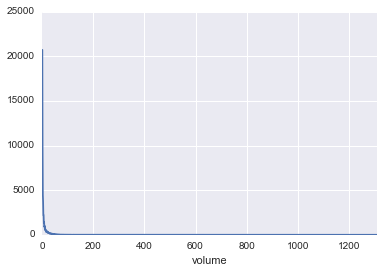

In [27]:
data["log_feature"].groupby("volume").agg(len)["log_feature"].plot()

In [28]:
# check if log features are different for each id, yes!
data["log_feature"].pivot_table(index=["id"], values=["log_feature"], aggfunc=lambda x: x.nunique()==x.count()).sum()

log_feature    18552
dtype: int64

#### Remark:
+ volume and log feature should be categorized ??